# Gaussian process

We tested Gaussian process at the very beginning of our project.
Gaussian process are used when dealing with noisy or sparse data.
However, our data has been simulated from a deterministis PDE, hence no noise is included.
Also, our data is not sparse.

Gaussian processes are very computationally expensive, therefore we only fitted a sparse Gaussian Process, where we applied it on only 500 randomly chosen pixcels.

In [ ]:
# Cell 0

import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
# Cell 1

X_train = np.load('X_train.npy')
Y_train = np.load('Y_train.npy')
X_test = np.load('X_test.npy')
Y_test = np.load('Y_test.npy')

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

# Flatten outputs
Y_train_flat = Y_train.reshape((Y_train.shape[0], -1))  # (250, 10000)
Y_test_flat = Y_test.reshape((Y_test.shape[0], -1))      # (63, 10000)

# Remove outlier index 228
X_train_clean = np.delete(X_train, 228, axis=0)
Y_train_flat_clean = np.delete(Y_train_flat, 228, axis=0)

# Randomly select 500 output points
n_outputs = 500
selected_indices = np.random.choice(Y_train_flat_clean.shape[1], n_outputs, replace=False)

Y_train_reduced = Y_train_flat_clean[:, selected_indices]
Y_test_reduced = Y_test_flat[:, selected_indices]

print(f"Shape after selecting {n_outputs} outputs:")
print(Y_train_reduced.shape, Y_test_reduced.shape)


(250, 5) (250, 100, 100)
(63, 5) (63, 100, 100)
Shape after selecting 500 outputs:
(249, 500) (63, 500)


In [ ]:
# Cell 2

# Define Gaussian Process model
kernel = C(1.0, (1e-2, 1e2)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

gp = GaussianProcessRegressor(kernel=kernel,
                               n_restarts_optimizer=10,
                               alpha=1e-6,
                               normalize_y=True)

In [ ]:
# Cell 3

# Train 
print("\nTraining Gaussian Process...")
gp.fit(X_train_clean, Y_train_reduced)
print("Training done!")

# Predict 
print("\nPredicting...")
Y_train_pred = gp.predict(X_train_clean)
Y_test_pred = gp.predict(X_test)

# Evaluate
train_mse = mean_squared_error(Y_train_reduced, Y_train_pred)
test_mse = mean_squared_error(Y_test_reduced, Y_test_pred)

print(f"\nTraining MSE: {train_mse:.5f}")
print(f"Testing MSE: {test_mse:.5f}")



Training Gaussian Process...
Training done!

Predicting...

Training MSE: 0.00000
Testing MSE: 0.00856


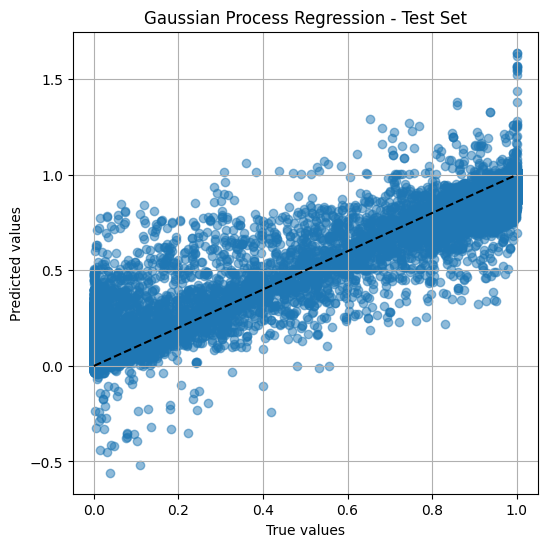

In [ ]:
# Cell 4

plt.figure(figsize=(6, 6))
plt.scatter(Y_test_reduced.flatten(), Y_test_pred.flatten(), alpha=0.5)
plt.plot([Y_test_reduced.min(), Y_test_reduced.max()], [Y_test_reduced.min(), Y_test_reduced.max()], 'k--')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('Gaussian Process Regression - Test Set')
plt.grid(True)
plt.show()


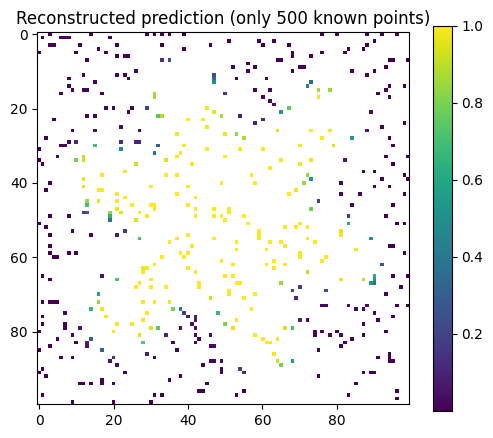

In [ ]:
# Cell  5

# Reconstruct image (for one test sample)

reconstructed_image = np.full(10000, np.nan)  # Start blank
reconstructed_image[selected_indices] = Y_test_pred[0]  # Pick first test sample prediction
reconstructed_image = reconstructed_image.reshape(100, 100)

plt.figure(figsize=(6, 5))
plt.imshow(reconstructed_image, cmap='viridis')
plt.colorbar()
plt.title('Reconstructed prediction (only 500 known points)')
plt.show()
